# Toyota Dataset

In [1]:
# import required the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, Ridge, RidgeCV, ElasticNetCV, ElasticNet,PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Dataset
toyota = pd.read_csv("ToyotaCorolla.csv", encoding ='latin1' )

### Before using the stated problem statement columns I would like to do exploratory data analysis to see the feature selection

In [3]:
#info and description for analysis
toyota.info(),'\t',toyota.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

(None,
 '\t',
                 Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
 count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
 mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
 std     416.476890   3626.964585    18.599988     3.354085     1.540722   
 min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
 25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
 50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
 75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
 max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   
 
                   KM           HP    Met_Color    Automatic           cc  ...  \
 count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
 mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
 std     37506.448872    14.981080     0.468616     0.

<AxesSubplot:>

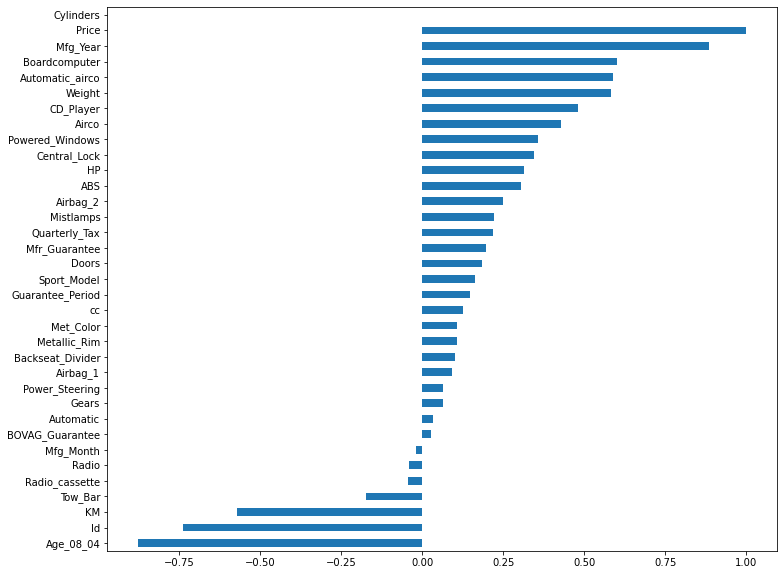

In [4]:
#checking correlation for feature extraction 
#removing variables with low correlation and simultaneously updating the dataset and correlation 
corr = toyota.corrwith(toyota.Price).sort_values()
plt.subplots(figsize=[12,10])
corr.plot(kind = "barh")

In [5]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
#dropping the features which are irrelevent and are not much correlated with the target variable

toyota=pd.read_csv("ToyotaCorolla.csv", encoding ='latin1' )
# toyota = toyota.drop(['Id', 'Model','Mfg_Month','Mfg_Year','Met_Color','Automatic','Sport_Model','Backseat_Divider',
#                       'Metallic_Rim','Radio_cassette','Automatic_airco','Boardcomputer','CD_Player','Central_Lock',
#                       'Powered_Windows','Power_Steering','Radio','Mistlamps','Tow_Bar','Cylinders','Mfr_Guarantee',
#                       'BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Fuel_Type'],axis=1) 

toyota = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]] 
##this is the substitute we can use to directly use only the required features

#### only features that will be used are ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]

In [7]:
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
toyota.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


### defining X and Y variables

In [9]:
X = toyota.drop(['Price'],axis=1)
Y = toyota.Price


## Plotting scatter for relationship and pattern analysis

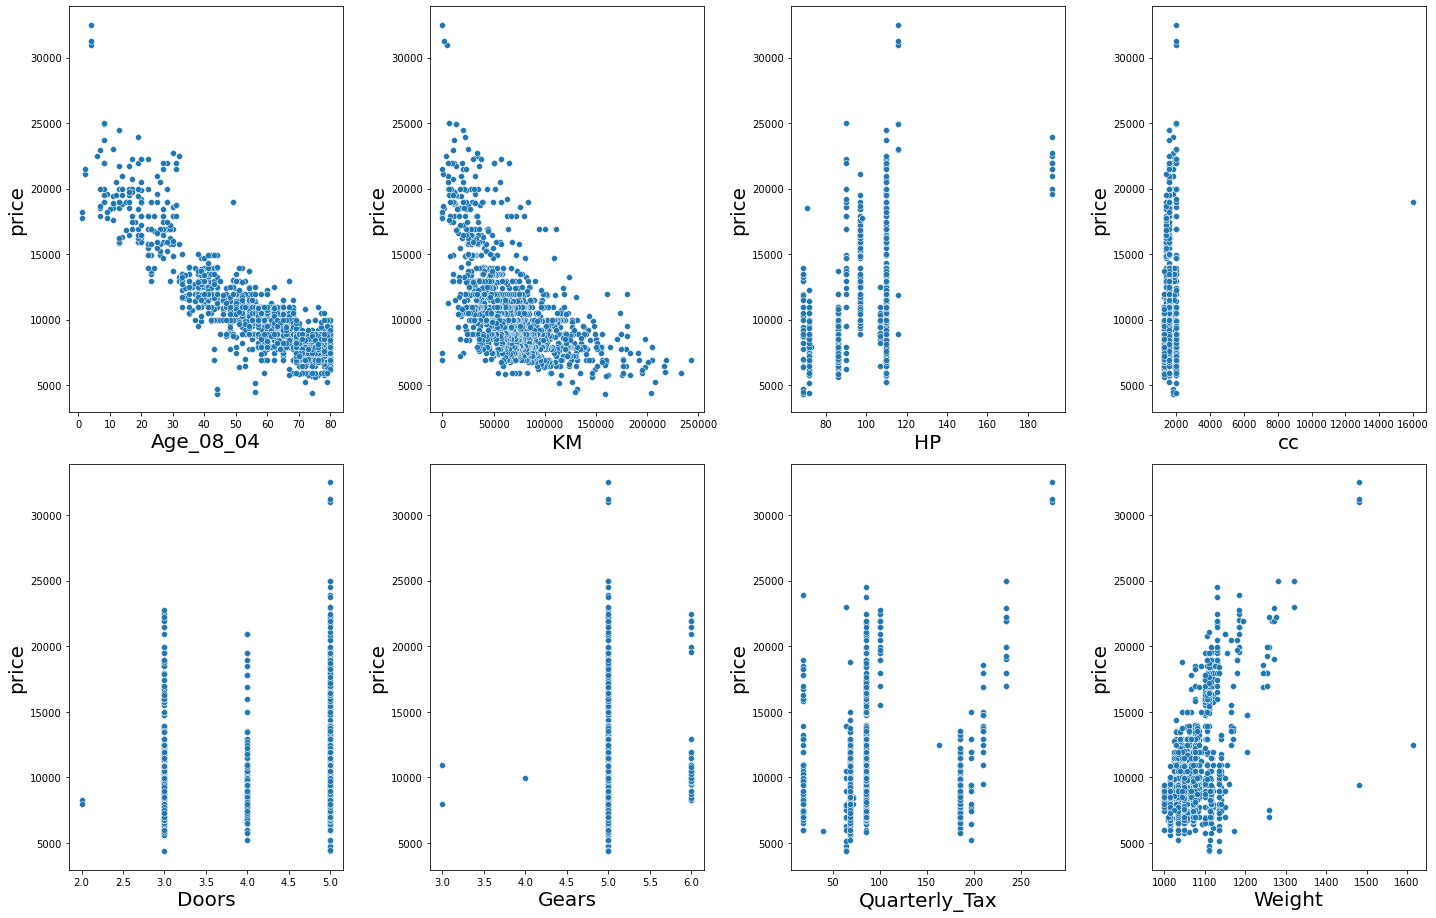

In [10]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

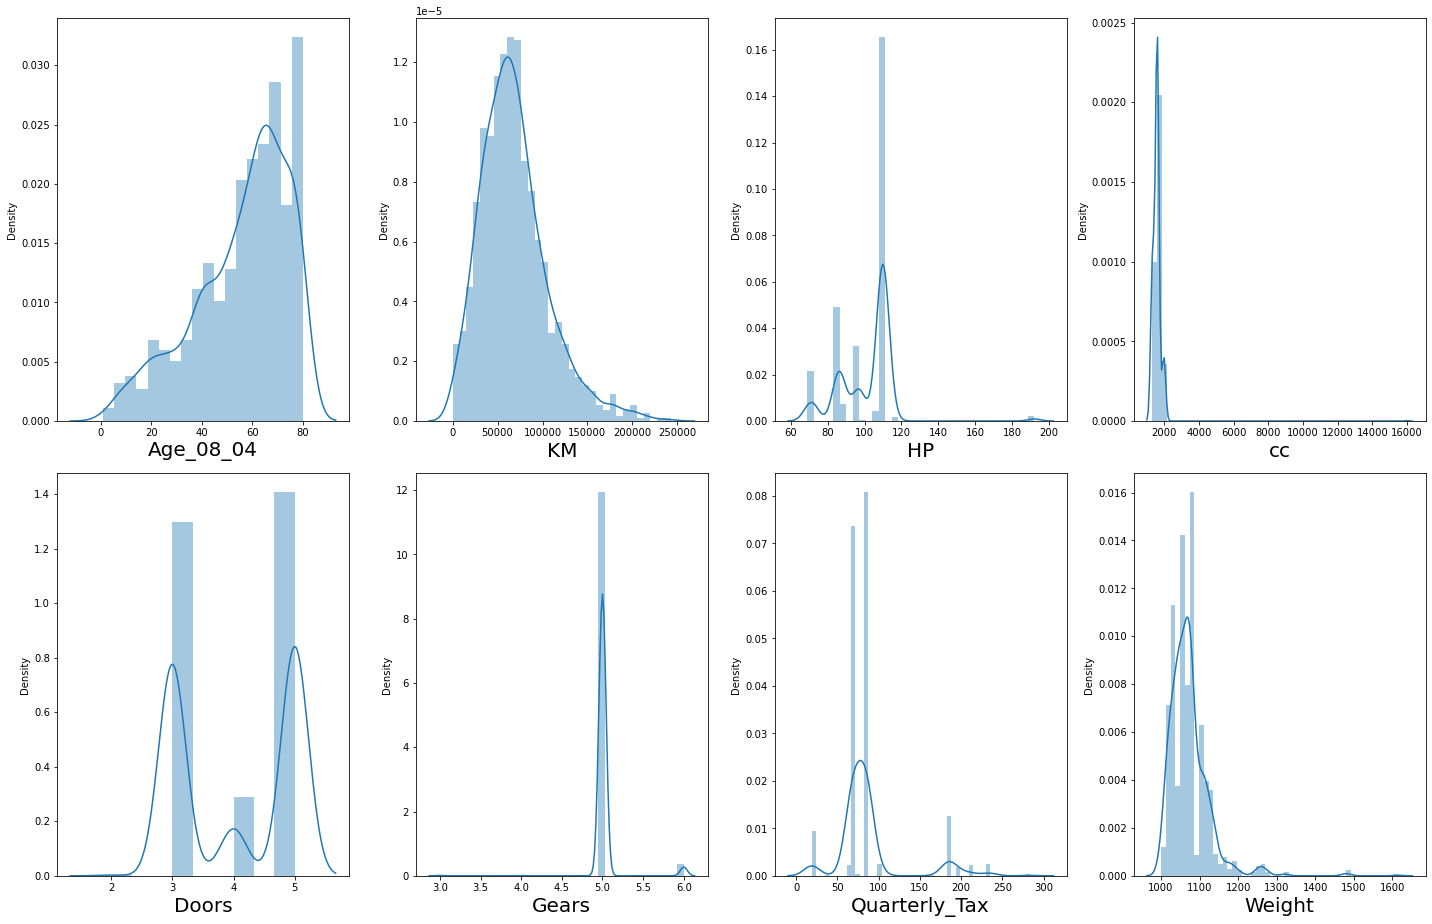

In [11]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='KM'>

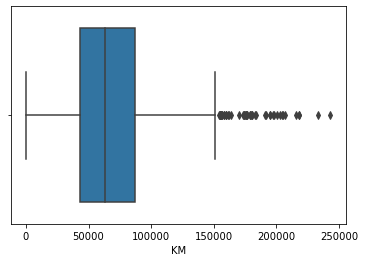

In [12]:
sns.boxplot(toyota.KM)

In [13]:
#cc
toyota.cc[toyota['cc']==16000]
#as we can see there is only one value of cc which is greater then rest of the values .
#we can impute by looking at the corresponding row values the row no 80 has cc 16000 

80    16000
Name: cc, dtype: int64

In [14]:
toyota[75:85]
#here we can see hp weight and rest of the features to check the max cc value may be typed wrong
#i am using imputation technique to correct that value

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
75,16950,23,28000,110,1600,5,5,85,1115
76,18750,31,25266,110,1600,5,5,85,1130
77,18450,27,23489,110,1600,5,5,85,1115
78,16895,29,22575,110,1600,5,5,85,1115
79,14900,30,22000,97,1400,5,5,85,1110
80,18950,25,20019,110,16000,5,5,100,1180
81,17250,29,20000,110,1600,5,5,85,1115
82,15450,25,17003,97,1400,5,5,85,1110
83,17950,31,16238,110,1600,5,5,100,1180
84,16650,25,15414,97,1400,5,5,85,1110


In [15]:
#Gears
toyota.Gears.value_counts(),'\n',toyota.Gears[toyota.Gears==4],'/t', toyota.Gears[toyota.Gears==3]
#there is only one value of gear 4 and 2 of gear 3 its hard to have that value with cars
# so we can either drop or impute by clustering them using other features 

(5    1390
 6      43
 3       2
 4       1
 Name: Gears, dtype: int64,
 '\n',
 1426    4
 Name: Gears, dtype: int64,
 '/t',
 956    3
 991    3
 Name: Gears, dtype: int64)

In [16]:
toyota[1420:1430]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1420,8150,76,36537,110,1600,4,5,85,1075
1421,8500,78,36000,86,1300,3,5,69,1045
1422,7600,78,36000,110,1600,3,5,69,1050
1423,7950,80,35821,86,1300,3,5,19,1015
1424,7750,73,34717,86,1300,3,5,69,1015
1425,7950,80,34000,86,1300,4,5,69,1000
1426,9950,78,30964,110,1600,3,4,85,1080
1427,8950,71,29000,86,1300,3,5,69,1045
1428,8450,72,26000,86,1300,3,5,69,1015
1429,8950,78,24000,86,1300,5,5,85,1065


In [17]:
toyota.Doors.value_counts()
#there is only two value of Door is 2 and it is possible to have two doors

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

In [18]:
toyota.cc.replace(16000, 1600, inplace=True)
toyota.Gears.replace({toyota.Gears[1426],toyota.Gears[956],toyota.Gears[991]},int(toyota.Gears.mode()),inplace=True)
toyota.Weight.replace(1615, int(toyota.Weight.mean()), inplace=True)

In [19]:
toyota.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,1566.827994,4.033426,5.029944,87.122563,1072.081476
std,3626.964585,18.599988,37506.448872,14.981080,187.182436,0.952677,0.170493,41.128611,50.653950
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,5.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,2000.000000,5.000000,6.000000,283.000000,1480.000000


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
vif_data = pd.DataFrame({'vif':vif})
vif_data["feature"] = X.columns

In [21]:
vif_data # vif of Gears is high so we can remove that feature

,vif,feature
0,16.392684,Age_08_04
1,7.590522,KM
2,64.894960,HP
3,17.199750,cc
4,21.874692,Doors
5,438.631804,Gears
6,11.020074,Quarterly_Tax
7,543.133076,Weight


In [22]:
X.drop(['Gears'],axis=1, inplace=True)

In [23]:
vif=[variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
vif_data = pd.DataFrame({'vif':vif})
vif_data["feature"] = X.columns
vif_data

,vif,feature
0,14.658578,Age_08_04
1,7.578918,KM
2,62.749676,HP
3,17.127997,cc
4,20.793757,Doors
5,10.144393,Quarterly_Tax
6,132.884318,Weight


<AxesSubplot:>

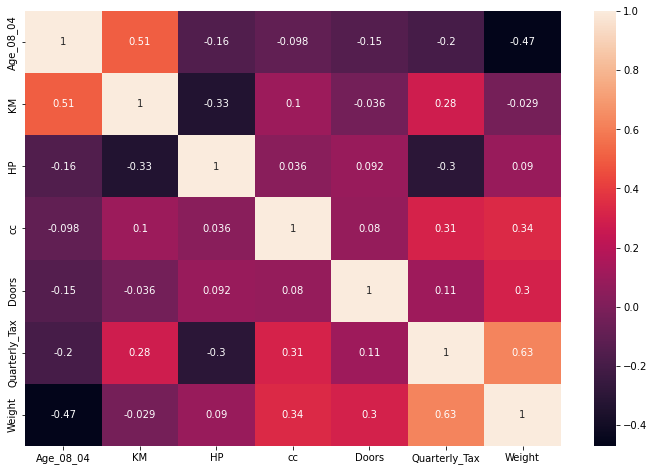

In [24]:
plt.subplots(figsize=[12,8])
sns.heatmap(X.corr(), annot=True)

In [25]:
# gear has all the same values so we can drop that column
#here door has single value that is 5 so we can remove that feature

# X.drop(['Weight'],axis=1, inplace=True)

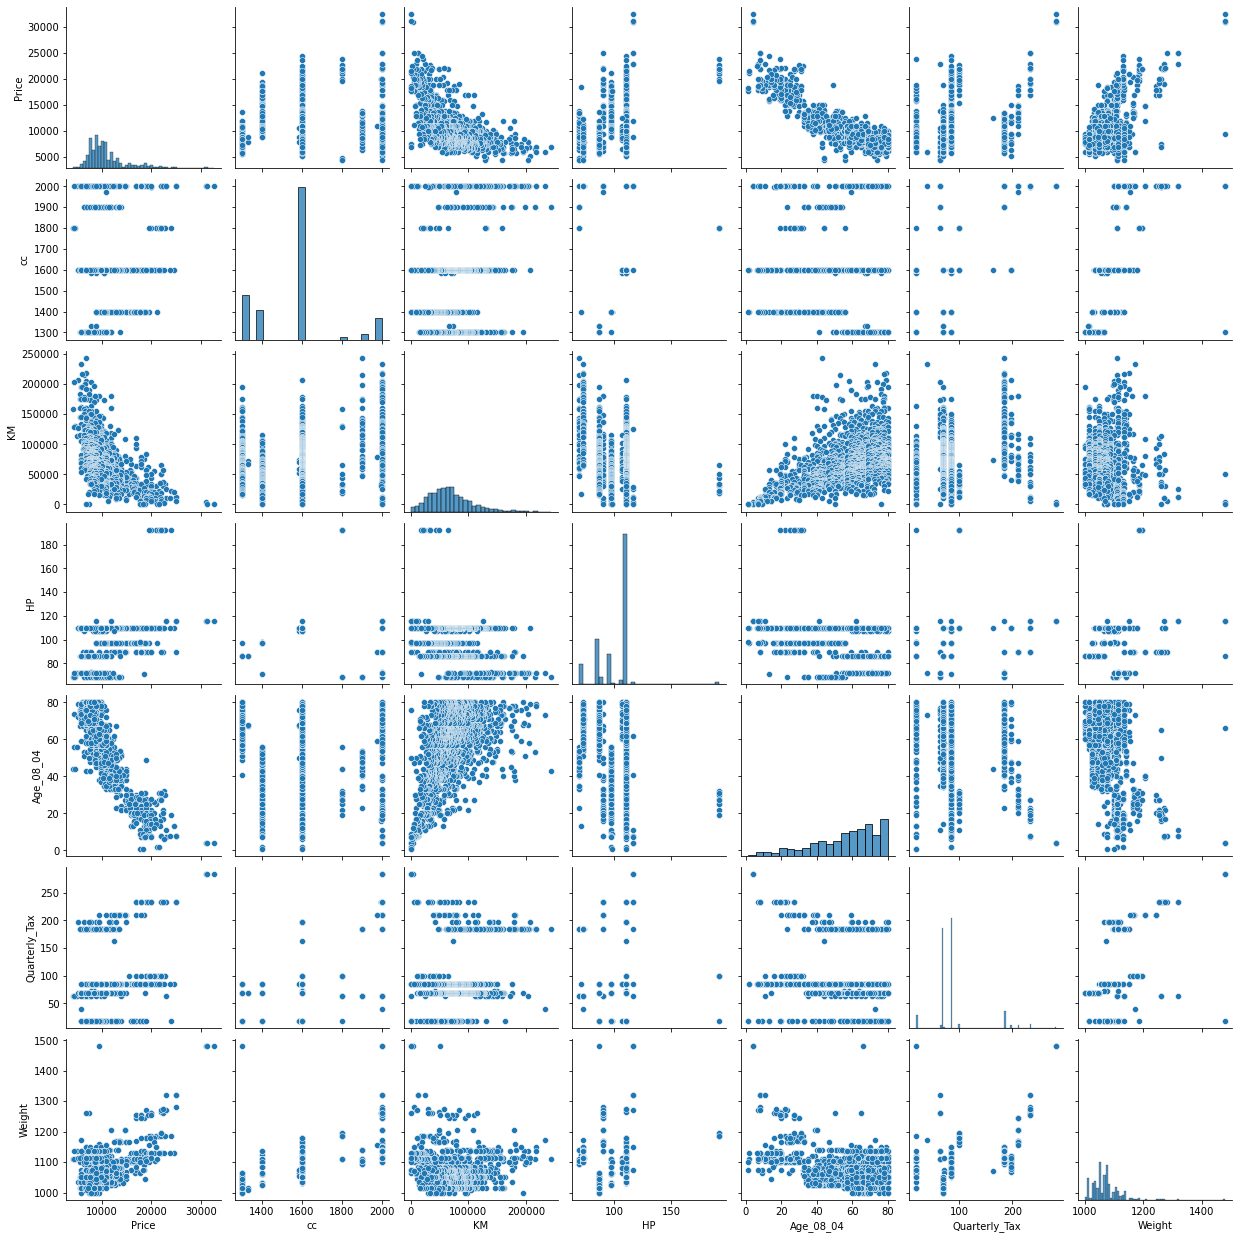

In [26]:
sns.pairplot(toyota[["Price","cc","KM","HP","Age_08_04",'Quarterly_Tax','Weight']])

In [27]:
X = pd.get_dummies(X,columns=['Doors'],prefix='door',drop_first=True)


### We can drop the Door column as the p-value for the it is coming high

In [28]:
X.drop(columns=['door_3','door_4','door_5'],inplace=True)

### preparing model

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, random_state=100)

In [30]:
#scaler transformation of data 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

In [31]:
x_scaled

array([[ 0.74700767, -0.1970343 ,  0.55682947,  0.04223075, -0.44509536,
        -0.72172308],
       [ 0.20968636, -0.09231429,  0.55682947,  0.04223075, -0.0530597 ,
        -0.05251409],
       [ 0.37088276, -0.25054478, -1.00913619, -0.60171999, -1.67020679,
        -0.72172308],
       ...,
       [-0.91868838, -1.10216406, -0.29140193, -0.38706974, -0.0530597 ,
        -0.24371666],
       [-1.40227756, -1.24048865, -0.29140193, -0.38706974, -0.0530597 ,
         0.71229619],
       [ 0.63954341,  0.17419465,  0.55682947,  0.04223075, -0.0530597 ,
        -0.05251409]])

In [32]:
model_ols = sm.OLS(y_train,sm.add_constant(x_scaled)).fit()

In [33]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1211.
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        01:13:37   Log-Likelihood:                -9904.8
No. Observations:                1148   AIC:                         1.982e+04
Df Residuals:                    1141   BIC:                         1.986e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.076e+04     40.009    268.938      0.000    1.07e+04    1.08e+04
x1         -2227.5044     56.368    -39.517      0.000   -2338.101   -2116.908
x2          -786.8228     52.969    -14.854      0.000    -890.751    -682.895
x3           521.6367     46.953     11.110      0.000     429.513     613.760
x4           -43.9691     42.819     -1.027      0.305    -127.982      40.043
x5            80.2125     62.148      1.291      0.197     -41.725     202.150
x6           978.3019     64.693     15.122      0.000     851.372    1105.232
==============================================================================
Omnibus:                      156.626   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1266.385
Skew:                          -0.337   Prob(JB):                    1.02e-275
Kurtosis:                       8.101   Cond. No.                         3.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
linear = LinearRegression()
linear.fit(x_scaled,y_train)

LinearRegression()

In [35]:
linear.score(x_scaled,y_train)

0.8642422014180371

In [36]:
linear.score(scaler.transform(x_test),y_test)

0.8526640610111305

#### RMSE value for train and test are approx equal 

In [37]:
def get_train_test_rmse(model):
    y_train_pred = linear.predict(x_scaled)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
    
    y_test_pred = linear.predict(scaler.transform(x_test))
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
    
    print("train: ", rmse_train, "test: ",rmse_test)

In [38]:
get_train_test_rmse(linear)

train:  1351.4371524268101 test:  1324.2954566544413


In [39]:
#lasso regression
lassocv= LassoCV(alphas=None,cv=10,max_iter=1000, normalize=True,random_state=24)
lassocv.fit(x_scaled,y_train)

LassoCV(cv=10, normalize=True, random_state=24)

In [40]:
alpha=lassocv.alpha_
alpha

3.102490446759756

In [41]:
lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(x_scaled,y_train)

Lasso(alpha=3.102490446759756)

In [42]:
lasso_reg.score(x_scaled,y_train),lasso_reg.score(scaler.transform(x_test),y_test)

(0.8642379976112853, 0.8526098464478811)

In [43]:
get_train_test_rmse(lasso_reg)

train:  1351.4371524268101 test:  1324.2954566544413


In [44]:
#ridge regression
#cross-validation for alpha and lambda values
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=15,normalize = True)
ridgecv.fit(x_scaled, y_train)

RidgeCV(alphas=array([0.0862025 , 0.7825592 , 9.48902012, 3.42426611, 2.27751993,
       7.29686988, 4.05398439, 0.26461366, 2.18088998, 4.99513915,
       7.87700142, 3.13728797, 1.8419327 , 4.01636389, 1.64819663,
       7.18878152, 5.24942584, 2.42474307, 8.2127876 , 1.15643363,
       4.44182086, 7.7791119 , 1.29598641, 9.70335929, 8.9279129 ,
       8.04197102, 4.17886832, 0.79987252, 9.40423584, 5.08935215,
       0.23234415, 1.14230791, 2.928965  , 7.74896375, 6.04409722,
       2.76222637, 5.03706947, 3.51799111, 5.92337257, 6.26954267,
       7.34186323, 0.58168721, 4.19500936, 6.67085267, 6.99725427,
       1.57676424, 3.60273008, 9.83204087, 0.83856359, 3.24559026]),
        cv=15, normalize=True)

In [45]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_scaled, y_train)

Ridge(alpha=0.2646136575744018)

In [46]:
ridge_model.score(x_scaled,y_train),ridge_model.score(scaler.transform(x_test),y_test)

(0.8642421792103827, 0.8526674975267542)

In [47]:
get_train_test_rmse(ridge_model)

train:  1351.4371524268101 test:  1324.2954566544413


In [48]:
#elastic-net regression 
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_scaled, y_train)

ElasticNetCV(cv=10)

In [49]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_scaled, y_train)

ElasticNet(alpha=6.420367348575556)

In [50]:
elasticnet_reg.score(x_scaled,y_train),elasticnet_reg.score(scaler.transform(x_test),y_test)

(0.5142944567328974, 0.5144090307299146)

In [51]:
get_train_test_rmse(elasticnet_reg)

train:  1351.4371524268101 test:  1324.2954566544413


In [55]:
residuals = y_train-linear.predict(x_scaled)

In [67]:
##there are some outliers which we can remove

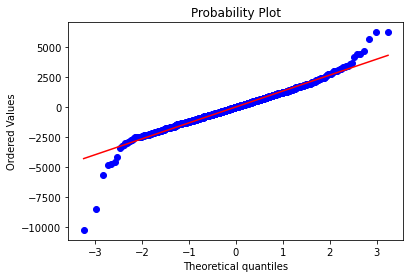

In [56]:
fig, ax = plt.subplots(figsize=(6,4))
stats.probplot(residuals, plot=ax, fit=True)

plt.show()

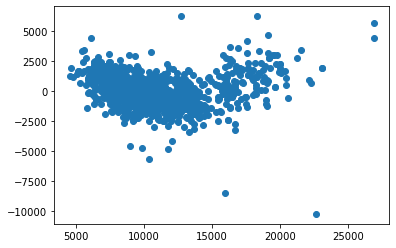

In [66]:
plt.scatter(linear.predict(x_scaled),residuals)
plt.show() 

## By using all the above regression methods we have found that all give almost similar results

## The accuracy for model is 86.4%